<a href="https://colab.research.google.com/github/pabloinsente/CovNet_Human_Drawings/blob/master/baseline_binary_classification_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baseline for binary classification of child/adult from drawings 

##Data Preparation

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE 

from numpy import genfromtxt
from collections import Counter
import matplotlib.pyplot as plt

In [0]:
# Clone the data into Colab
! git clone https://github.com/pabloinsente/CovNet_Human_Drawings

In [6]:
# Get data
x_path= 'CovNet_Human_Drawings/data/merged_dataframes_prediction/x_train_drawings_features_max_pool_5_pca.csv'
y_path = 'CovNet_Human_Drawings/data/merged_dataframes_prediction/y_train_age_adult_labels.csv'

x = genfromtxt(x_path, delimiter=',')
y = genfromtxt(y_path, delimiter=',')

print(x.shape) # (258, 200)
print(y.shape) # (258,)

(258, 200)
(258,)


In [10]:
# Split data into train and test sets
# Since we have an small sample, we will do a 70/30 split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=44)
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape)

(180, 200)
(180,)
(78, 200)
(78,)


##Resampling Imbalanced Data
Since our classes are imbalanced, we will use oversampling of the "adult" class **on the training set**  to help training on that class. *imblearn* implement oversampling for us

**See documentantion at** https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html

In [63]:
#ros = RandomOverSampler(random_state=42)
ros = SMOTE(random_state=42)

x_train_res, y_train_res = ros.fit_resample(x_train, y_train)
print(x_train_res.shape) # (258, 200)
print(y_train_res.shape) # (258,)
print('Resampled dataset shape %s' % Counter(y_train_res))

# Now we have 50/50 balanced classes

(286, 200)
(286,)
Resampled dataset shape Counter({1.0: 143, 0.0: 143})


Resampled dataset shape Counter({1.0: 143, 0.0: 143})


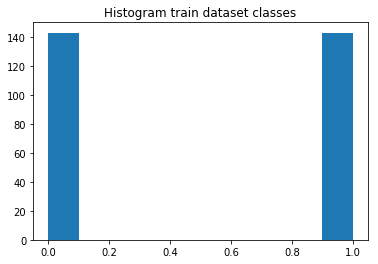

In [73]:
x_train = x_train_res
y_train = y_train_res
print('Resampled dataset shape %s' % Counter(y_train))
plt.hist(y_train, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram train dataset classes")
plt.show()

Test dataset shape Counter({0.0: 65, 1.0: 13})


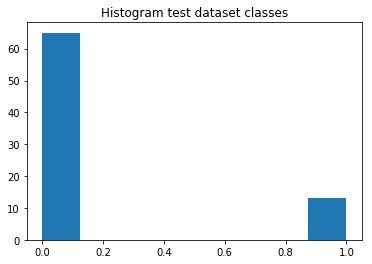

In [74]:
print('Test dataset shape %s' % Counter(y_test))
plt.hist(y_test, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram test dataset classes")
plt.show()

## Logistic Regression 




In [0]:
from sklearn.linear_model import LogisticRegression

###Train logistic regression

In [65]:
# Train classifier
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(x_train, y_train)
y_pred = log_classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###Test logistic regression

In [66]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.7692307692307693 

Confusion Matrix 
 [[59  6]
 [12  1]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.83      0.91      0.87        65
       Adult       0.14      0.08      0.10        13

   micro avg       0.77      0.77      0.77        78
   macro avg       0.49      0.49      0.48        78
weighted avg       0.72      0.77      0.74        78



##Suport Vector Machine

In [0]:
from sklearn.svm import SVC

###Training support vector machine

In [0]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train) 
y_pred = svm.predict(x_test)

###Testing support vector machine

In [69]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.8205128205128205 

Confusion Matrix 
 [[64  1]
 [13  0]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.83      0.98      0.90        65
       Adult       0.00      0.00      0.00        13

   micro avg       0.82      0.82      0.82        78
   macro avg       0.42      0.49      0.45        78
weighted avg       0.69      0.82      0.75        78



##Decision Tree

In [0]:
from sklearn import tree

###Training decision tree

In [0]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(x_train, y_train) 
y_pred = d_tree.predict(x_test)

###Testing decision tree

In [78]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.6410256410256411 

Confusion Matrix 
 [[47 18]
 [10  3]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.82      0.72      0.77        65
       Adult       0.14      0.23      0.18        13

   micro avg       0.64      0.64      0.64        78
   macro avg       0.48      0.48      0.47        78
weighted avg       0.71      0.64      0.67        78



##Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

###Training Naive Bayes

In [0]:
bayes = GaussianNB()
bayes.fit(x_train, y_train) 
y_pred = bayes.predict(x_test)

###Testing Naive Bayes

In [82]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.7948717948717948 

Confusion Matrix 
 [[61  4]
 [12  1]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.84      0.94      0.88        65
       Adult       0.20      0.08      0.11        13

   micro avg       0.79      0.79      0.79        78
   macro avg       0.52      0.51      0.50        78
weighted avg       0.73      0.79      0.76        78



## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

###Training Random Forest

In [0]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train) 
y_pred = forest.predict(x_test)

###Testing Random Forest

In [85]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.8461538461538461 

Confusion Matrix 
 [[65  0]
 [12  1]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.84      1.00      0.92        65
       Adult       1.00      0.08      0.14        13

   micro avg       0.85      0.85      0.85        78
   macro avg       0.92      0.54      0.53        78
weighted avg       0.87      0.85      0.79        78



##Gradient Boosting Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

###Training Gradient Boosting Classifier

In [0]:
boosting = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1)
boosting.fit(x_train, y_train) 
boosting = forest.predict(x_test)

###Testing Gradient Boosting Classifier

In [88]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.8461538461538461 

Confusion Matrix 
 [[65  0]
 [12  1]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.84      1.00      0.92        65
       Adult       1.00      0.08      0.14        13

   micro avg       0.85      0.85      0.85        78
   macro avg       0.92      0.54      0.53        78
weighted avg       0.87      0.85      0.79        78

